In [2]:
import numpy as np
import os
import glob
import numpy as np
import matplotlib.pyplot as plt


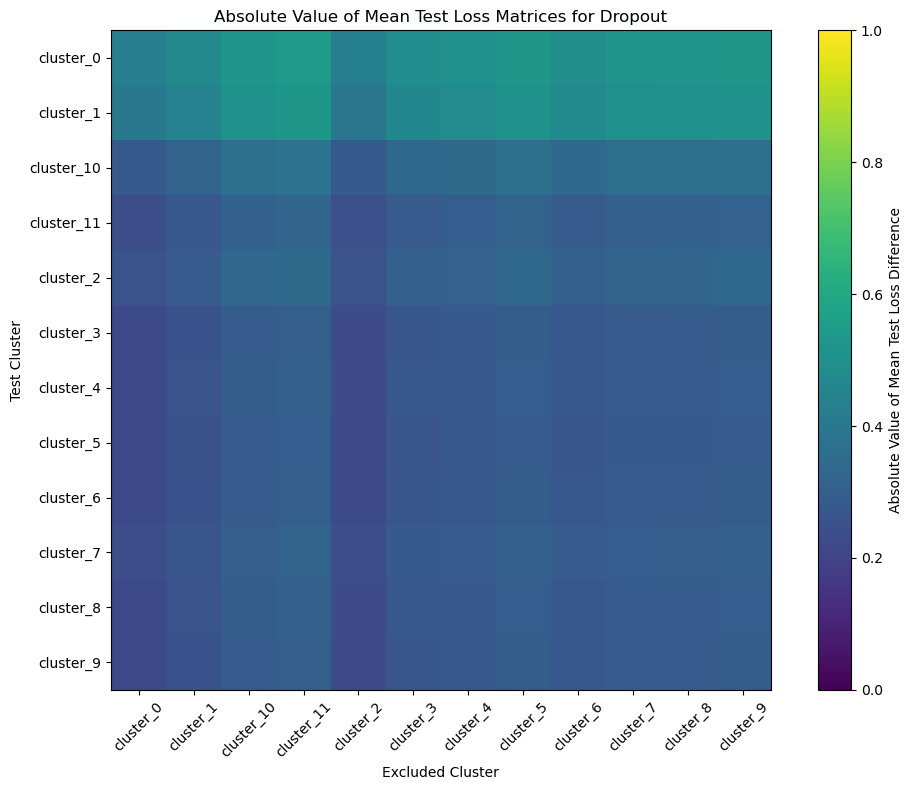

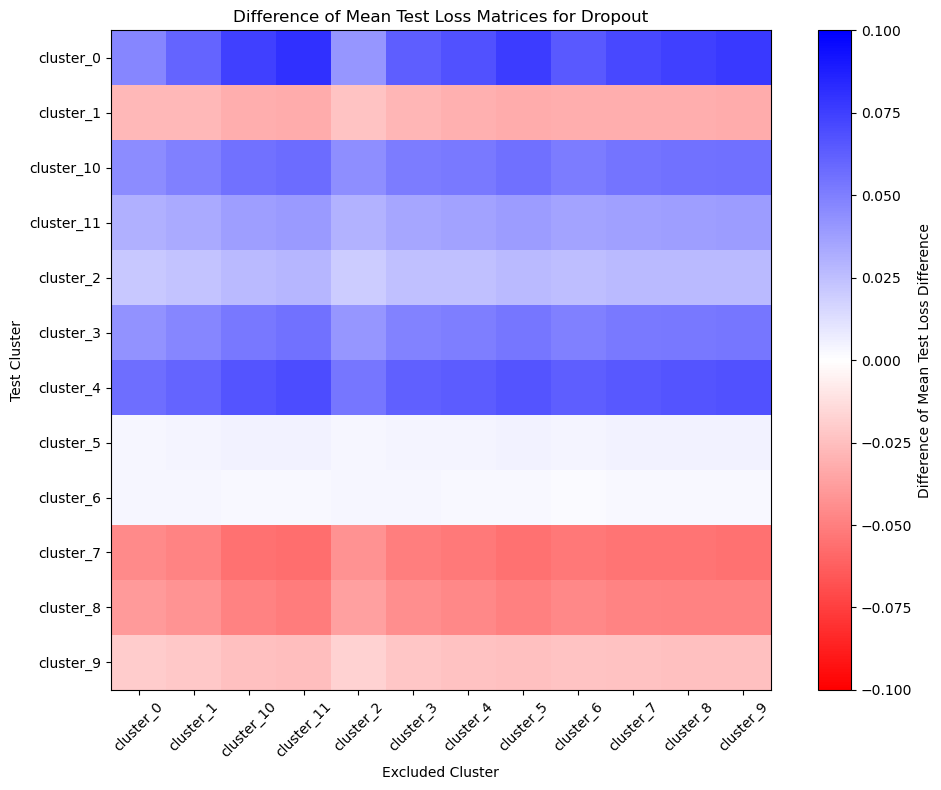

Experiment: 756x
Mean diagonal MSE: 0.3178298684068461
Consistency metric: 0.0033131594761802567


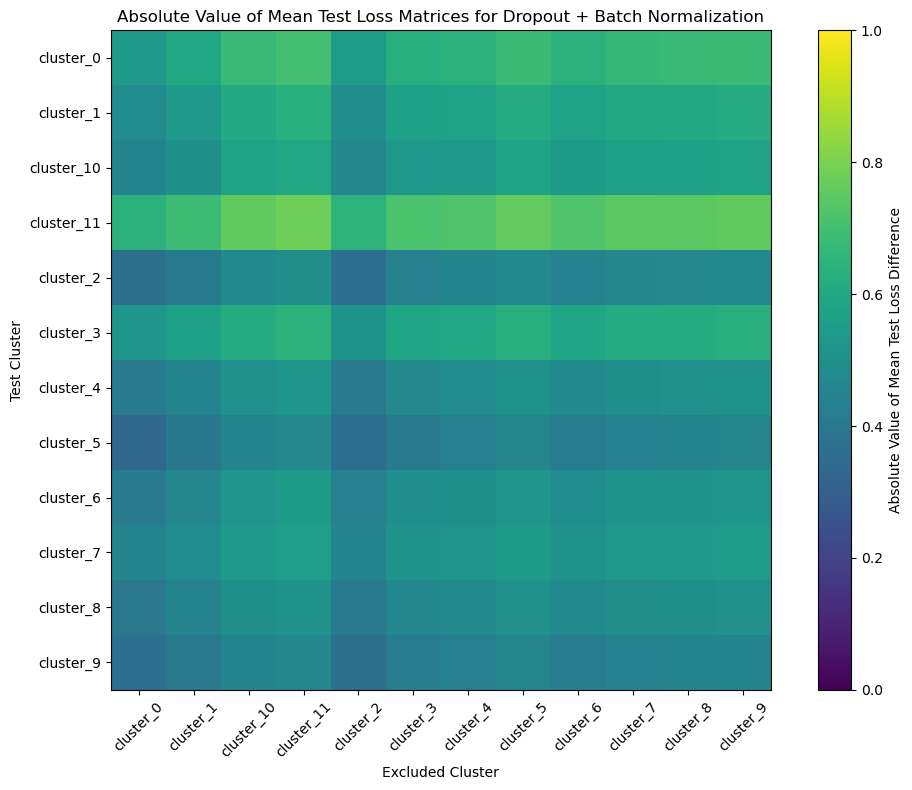

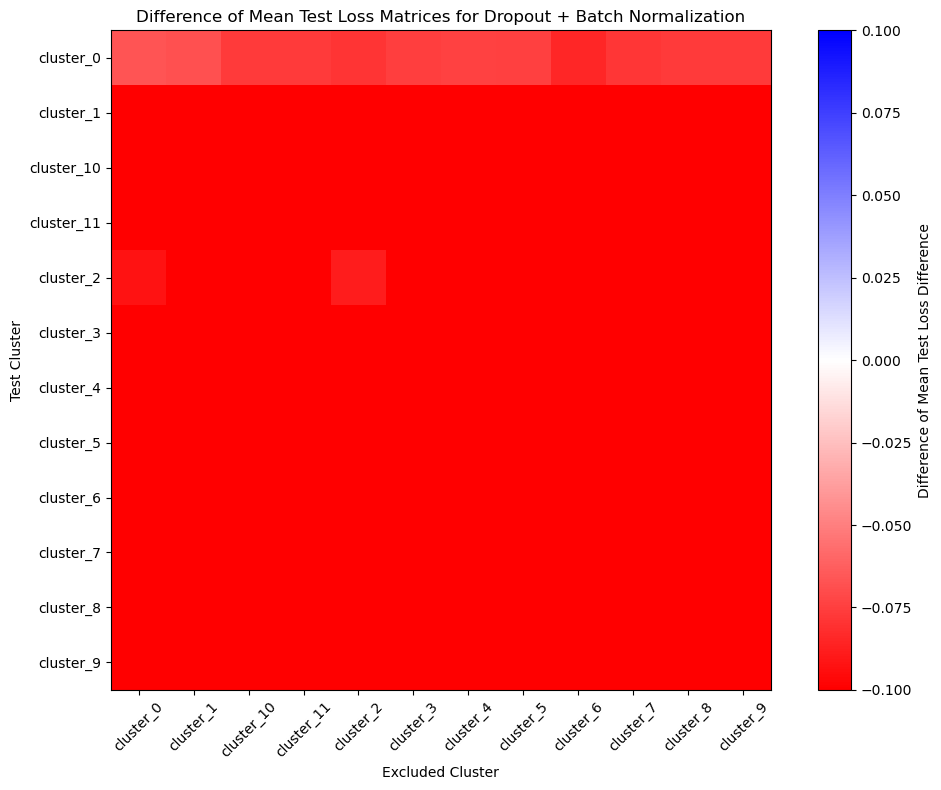

Experiment: bc8k
Mean diagonal MSE: 0.5244045093256814
Consistency metric: 0.004246952175046542


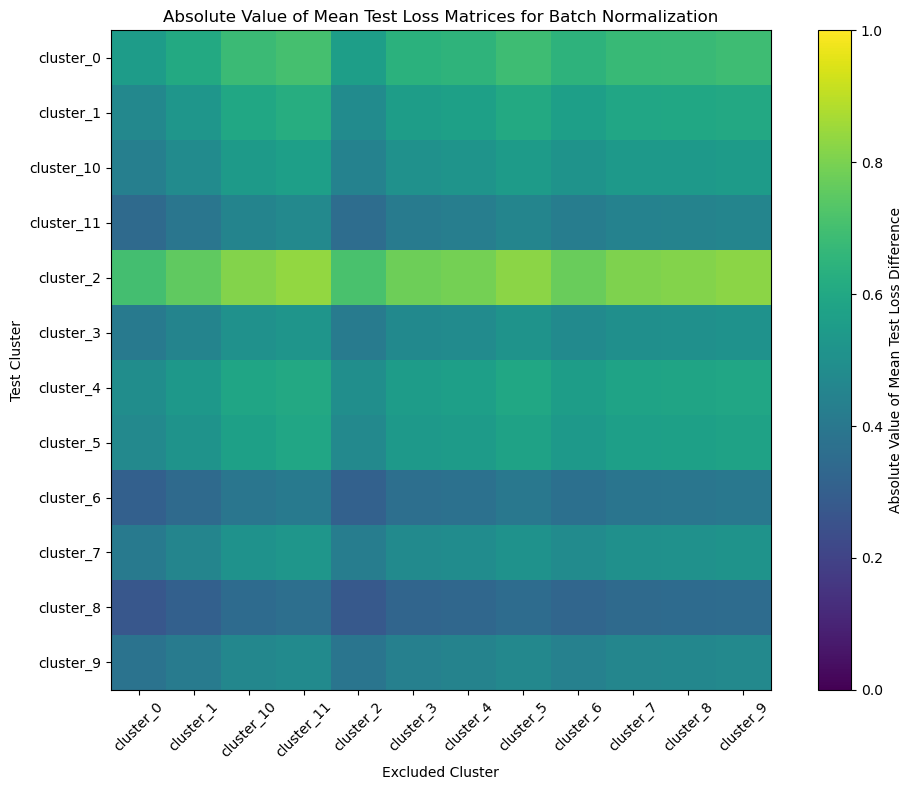

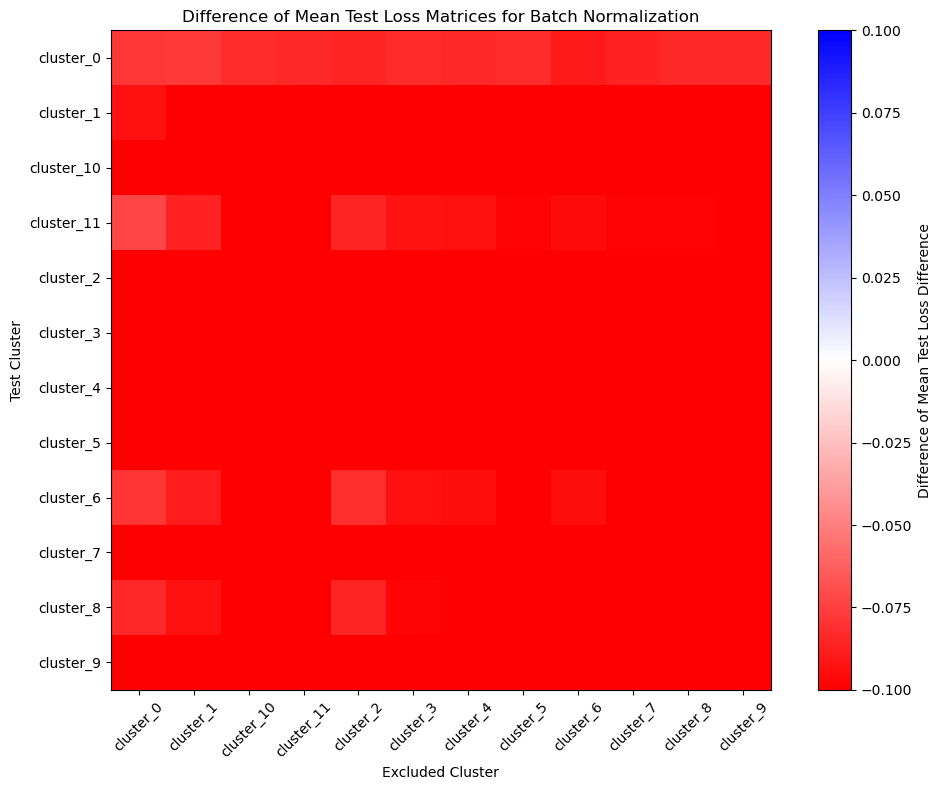

Experiment: bi4y
Mean diagonal MSE: 0.5089281492833296
Consistency metric: 0.004020764990138807


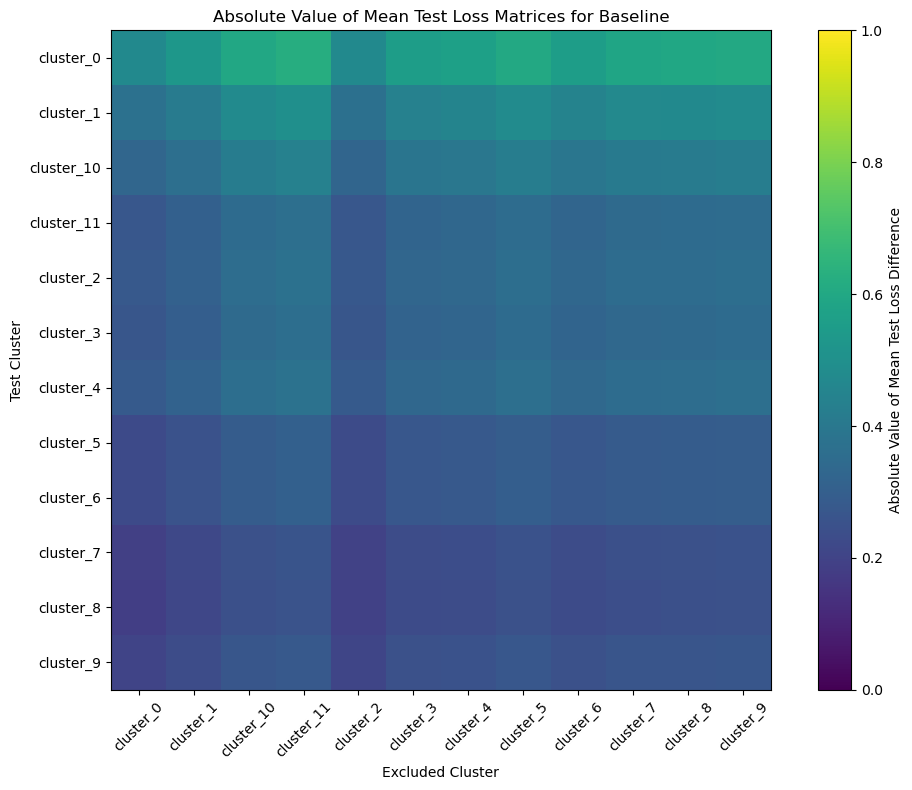

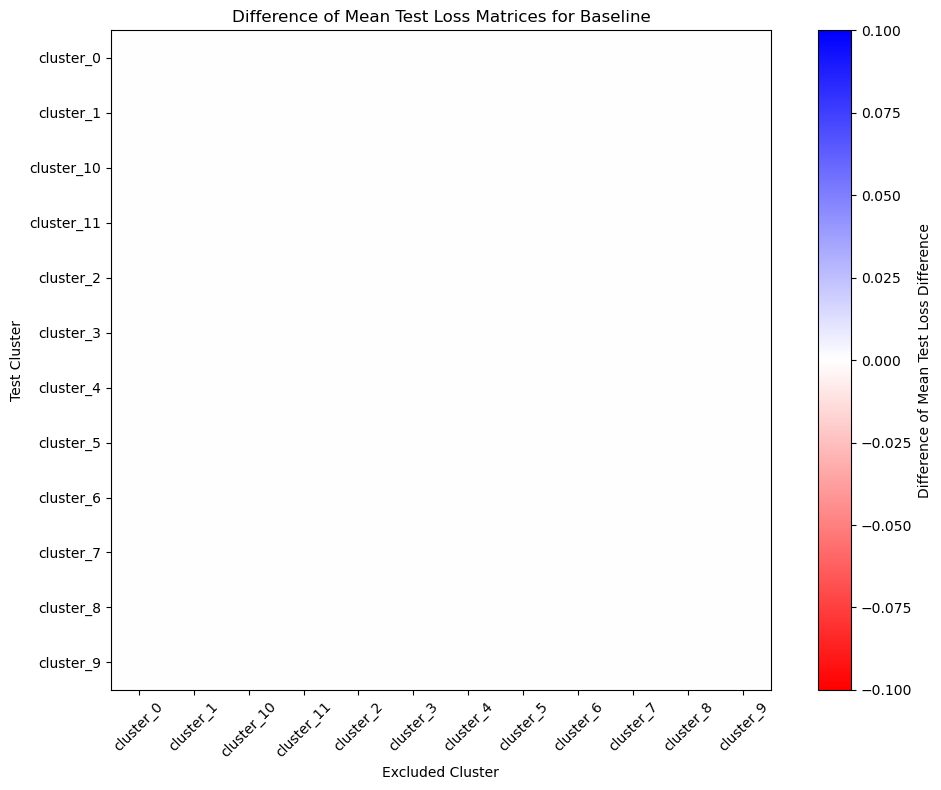

Experiment: ofwe
Mean diagonal MSE: 0.3282641360913427
Consistency metric: 0.00555421890639654


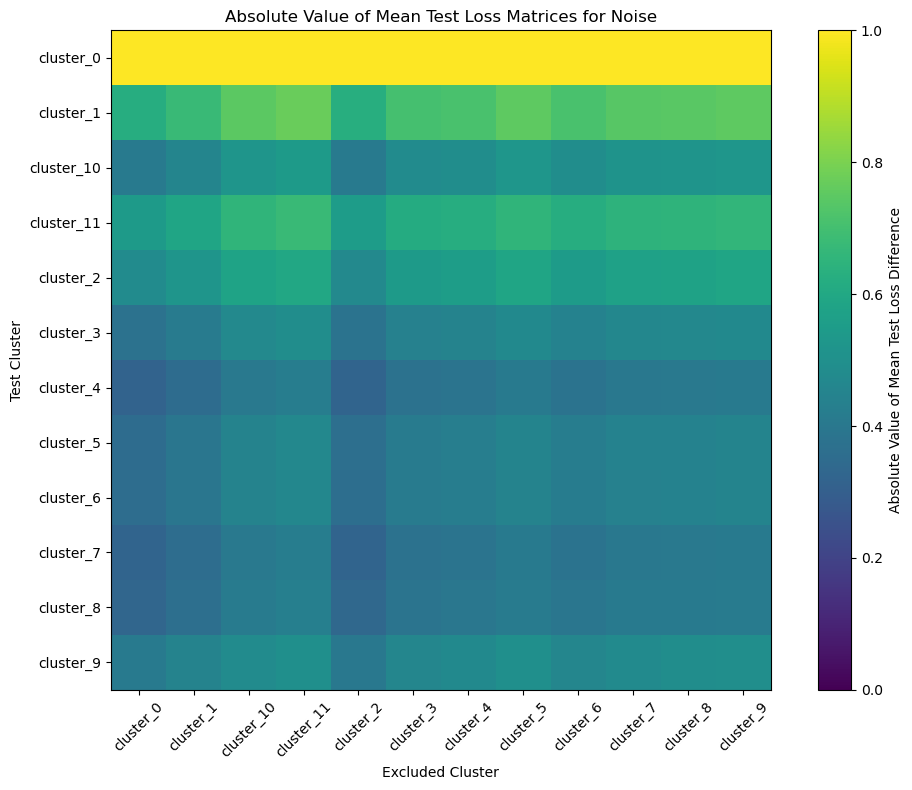

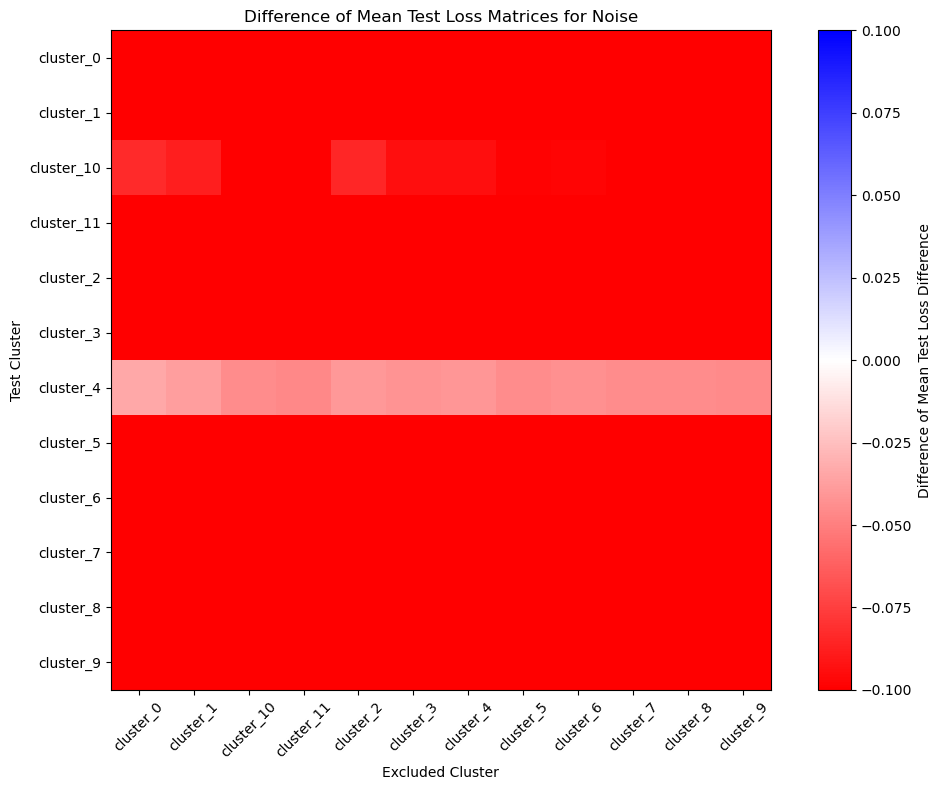

Experiment: t9pq
Mean diagonal MSE: 0.5672001214390987
Consistency metric: 0.0005355069667246435


In [14]:
import numpy as np

experiments = ["756x", "bc8k", "bi4y", "ofwe", "t9pq"]
labels = ["Dropout", "Dropout + Batch Normalization", "Batch Normalization", "Baseline", "Noise"]

dataloaders = {
    "cluster_0": [],
    "cluster_1": [],
    "cluster_10": [],
    "cluster_11": [],
    "cluster_2": [],
    "cluster_3": [],
    "cluster_4": [],
    "cluster_5": [],
    "cluster_6": [],
    "cluster_7": [],
    "cluster_8": [],
    "cluster_9": [],
}

consistency_list = []
mean_diagonal_list = []
# Load the .npz file
data = np.load(f"/Users/fquareng/experiments/new_dataset_12/UNet_experiments_12/ofwe/mean_test_loss_matrix.npz")
mean_test_loss_baseline = data["arr_0"]
for exp, l in zip(experiments, labels):
    data = np.load(f"/Users/fquareng/experiments/new_dataset_12/UNet_experiments_12/{exp}/mean_test_loss_matrix.npz")
    mean_test_loss = data["arr_0"]  # Adjust key if needed

    # Plot the difference matrix
    plt.figure(figsize=(10, 8))
    plt.imshow(np.abs(mean_test_loss), cmap='viridis', interpolation='nearest')
    plt.title(f"Absolute Value of Mean Test Loss Matrices for {l}")
    plt.xlabel("Excluded Cluster")
    plt.ylabel("Test Cluster")
    plt.xticks(np.arange(len(dataloaders)), list(dataloaders.keys()), rotation=45)
    plt.yticks(np.arange(len(dataloaders)), list(dataloaders.keys()))
    plt.tight_layout()
    # fix colo
    plt.clim(0, 1)
    plt.colorbar(label='Absolute Value of Mean Test Loss Difference')
    plt.show()

    # Plot the difference matrix
    plt.figure(figsize=(10, 8))
    plt.imshow(mean_test_loss_baseline - mean_test_loss, cmap='bwr_r', interpolation='nearest')
    plt.title(f"Difference of Mean Test Loss Matrices for {l}")
    plt.xlabel("Excluded Cluster")
    plt.ylabel("Test Cluster")
    plt.xticks(np.arange(len(dataloaders)), list(dataloaders.keys()), rotation=45)
    plt.yticks(np.arange(len(dataloaders)), list(dataloaders.keys()))
    plt.tight_layout()
    # fix colo
    plt.clim(-.1, .1)
    plt.colorbar(label='Difference of Mean Test Loss Difference')
    plt.show()

    # Ensure it's a square matrix (clusters x clusters)
    assert mean_test_loss.shape[0] == mean_test_loss.shape[1], "Matrix must be square"
    N = mean_test_loss.shape[0]

    # 1. Compute the mean of the diagonal (same cluster train-test)
    mean_diagonal = np.mean(np.diag(mean_test_loss))

    # 2. Compute the mean difference for each column
    sum_differences = []
    for i in range(mean_test_loss.shape[1]):
        column_values = mean_test_loss[:, i]
        diff = column_values - column_values[i]  # Difference from the diagonal value
        sum_diff = np.sum(np.delete(diff, i))  # Exclude the diagonal element
        sum_differences.append(sum_diff)

    # Convert to a NumPy array for easy handling
    consistency = 1/(N*(N-1))*np.sum(np.array(sum_differences))

    # Print results
    print(f"Experiment: {exp}")
    print(f"Mean diagonal MSE: {mean_diagonal}")
    print(f"Consistency metric: {consistency}")
    
    consistency_list.append(consistency)
    mean_diagonal_list.append(mean_diagonal)


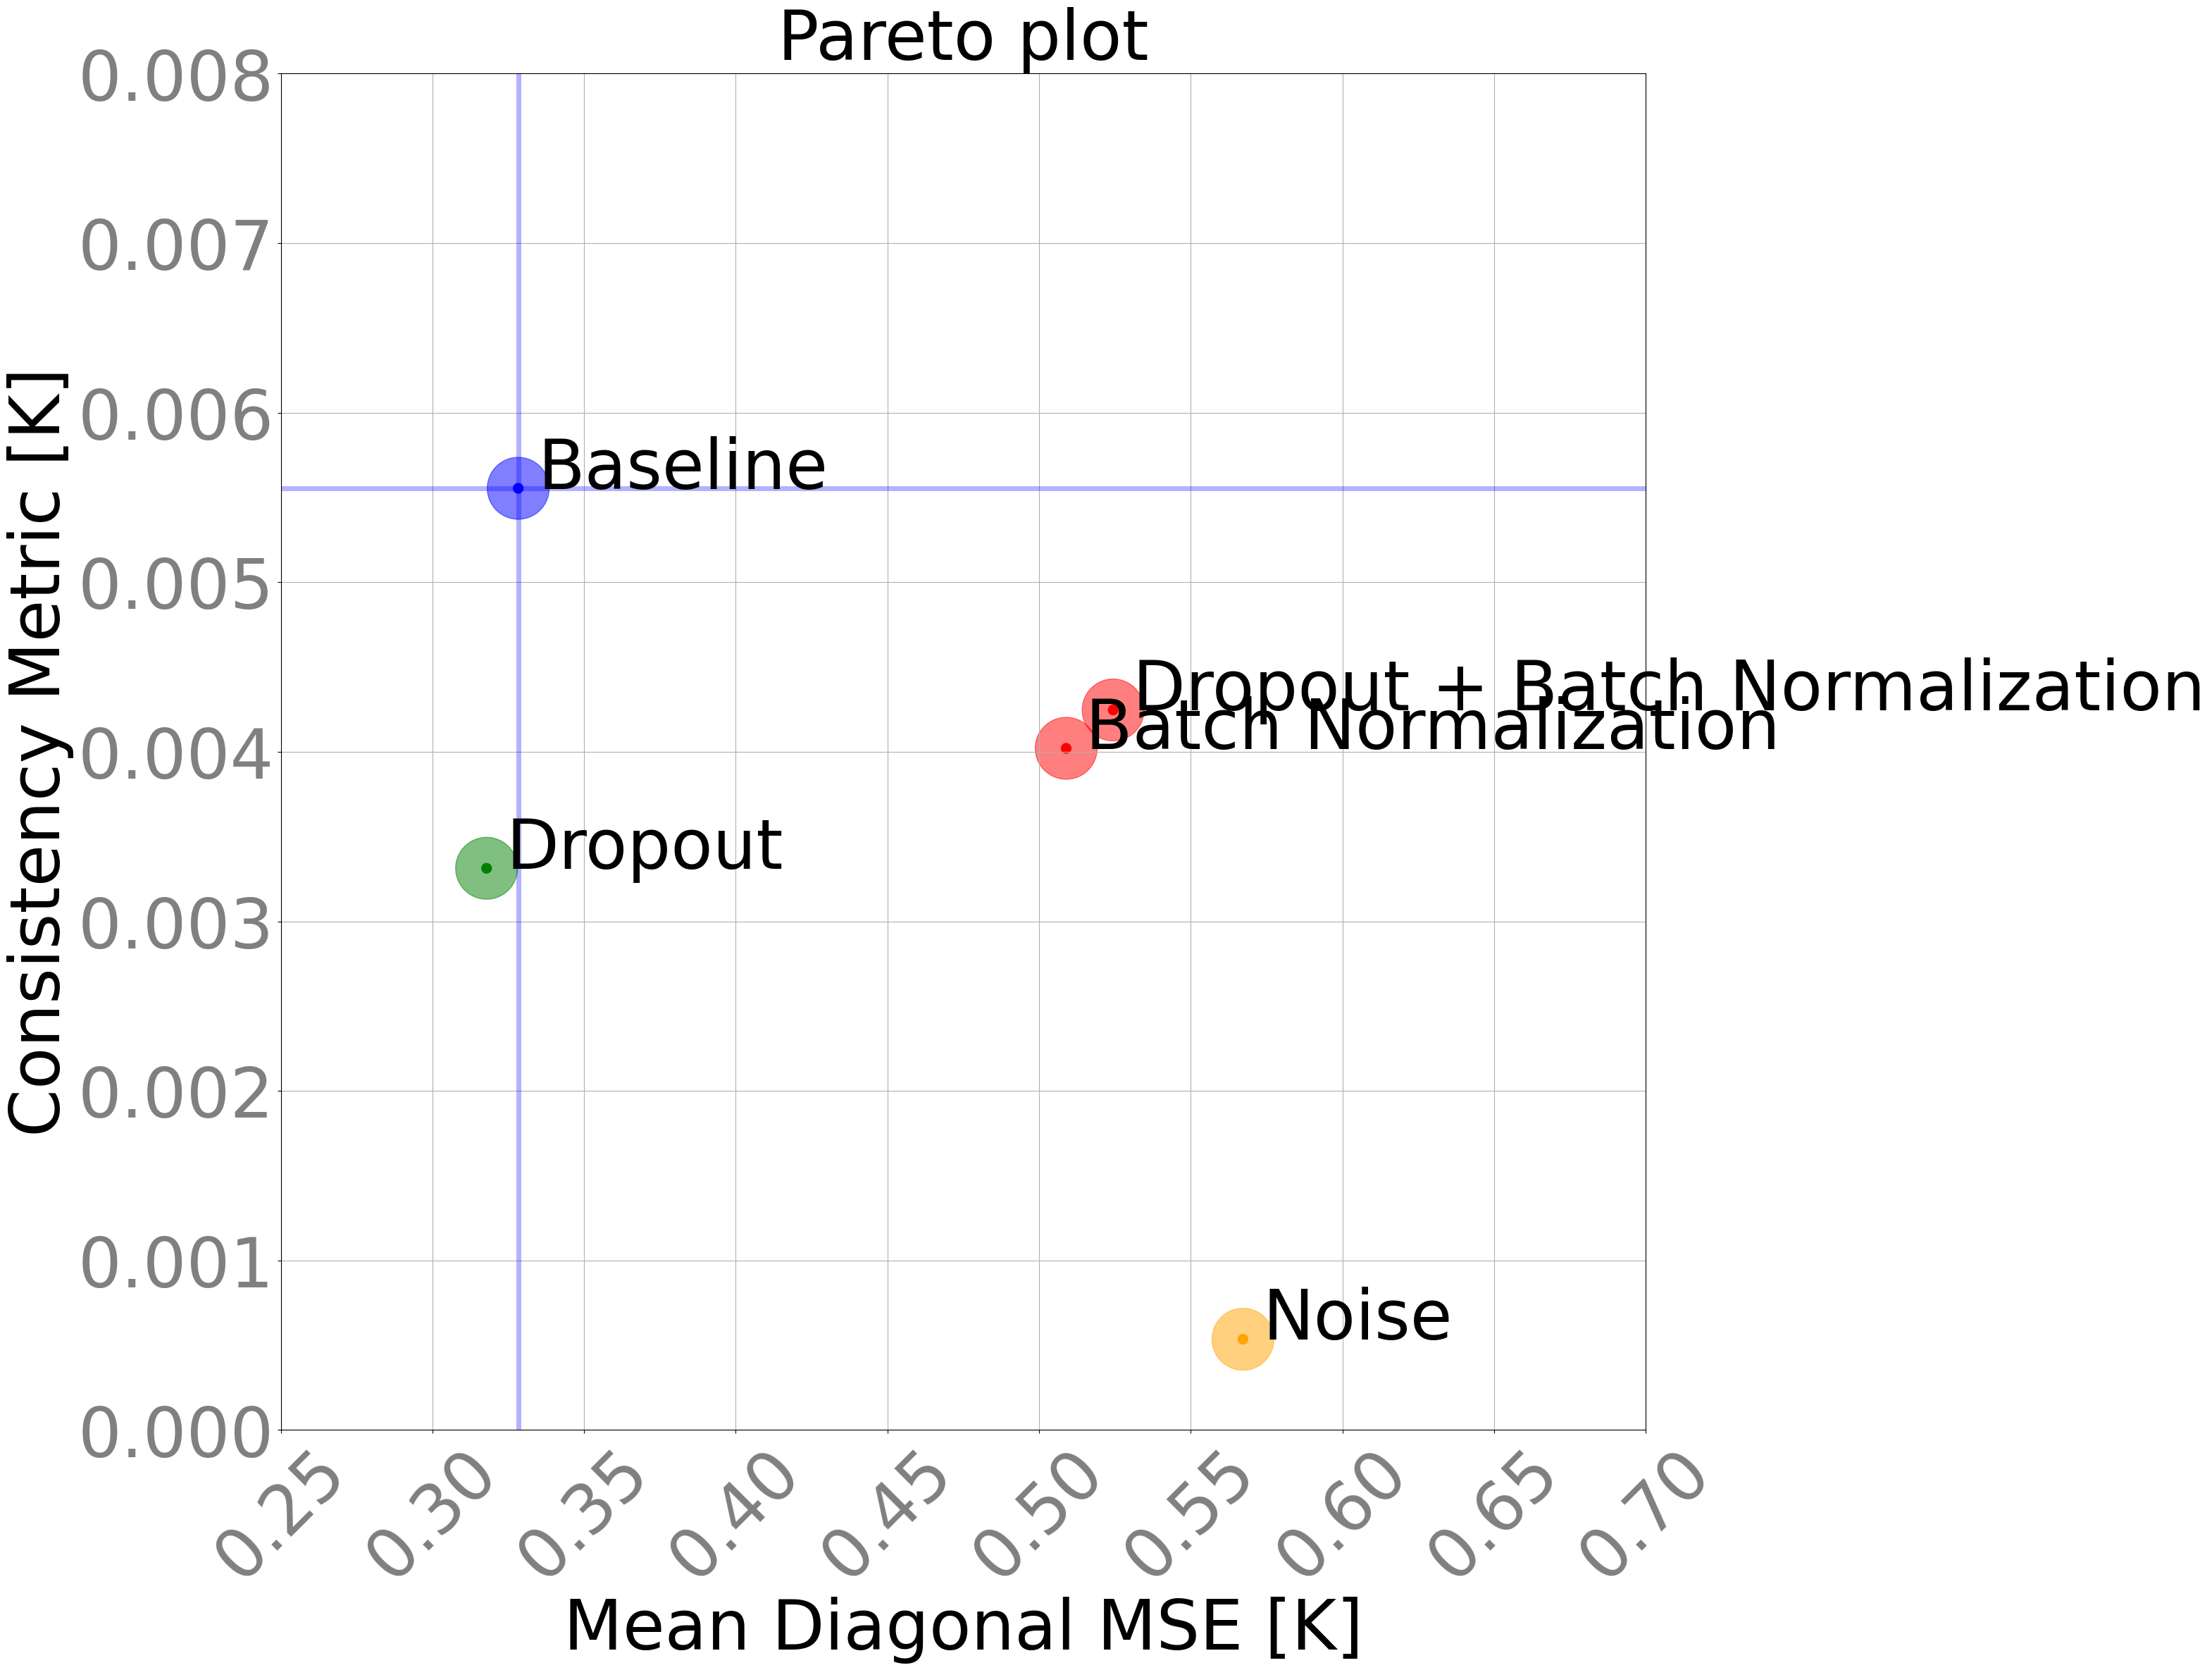

In [ ]:
# Plotting
f = 70
plt.figure(figsize=(25, 25))
# set different color for each point
c = ['green' if i == 0 else 'blue' if i == 3 else 'orange' if i == 4 else 'red' for i in range(len(mean_diagonal_list))]
plt.axvline(mean_diagonal_list[3], color='blue', linestyle='-', linewidth=5, alpha=0.3)
plt.axhline(consistency_list[3], color='blue', linestyle='-', linewidth=5, alpha=0.3)
plt.scatter([x for x in mean_diagonal_list], [x for x in consistency_list], color=c, s=4000, alpha=0.5)
plt.scatter([x for x in mean_diagonal_list], [x for x in consistency_list], color=c, s=100, alpha=1)
plt.title('Pareto plot', fontsize=f)
# Add labels and grid
plt.xlabel('Mean Diagonal MSE [K]', fontsize=f, color='grey')
plt.ylabel('Consistency Metric [K]', fontsize=f, color='grey')
plt.grid(True)
plt.xticks(rotation=45, fontsize=f, color='grey')
plt.yticks(fontsize=f, color='grey')
plt.xlim(0.25, 0.7)
plt.ylim(0, 0.008)
# Add lables for each point
for i, txt in enumerate(labels):
    plt.annotate(txt, (mean_diagonal_list[i], consistency_list[i]), fontsize=f, textcoords="offset points", xytext=(20, 0), ha='left')

In [16]:

def plot_mean_test_loss_matrix(mean_test_loss_matrix, dataloaders, save_path):
    """"
    Plots the mean test loss matrix for all clusters.
    """
    # Plot mean test loss matrix
    fig, ax = plt.subplots(figsize=(10, 8))
    cax = ax.matshow(mean_test_loss_matrix, cmap='coolwarm')
    plt.colorbar(cax)
    ax.set_xticks(np.arange(len(dataloaders)))
    ax.set_yticks(np.arange(len(dataloaders)))
    ax.set_xticklabels(list(dataloaders.keys()))
    ax.set_yticklabels(list(dataloaders.keys()))
    plt.xlabel("Excluded Cluster")
    plt.ylabel("Test Cluster")
    plt.title("Mean Test Loss Matrix")
    plt.tight_layout()
    plt.savefig(os.path.join(save_path, "mean_test_loss_matrix.png"))
    plt.close(fig)  # Close the figure to free memory

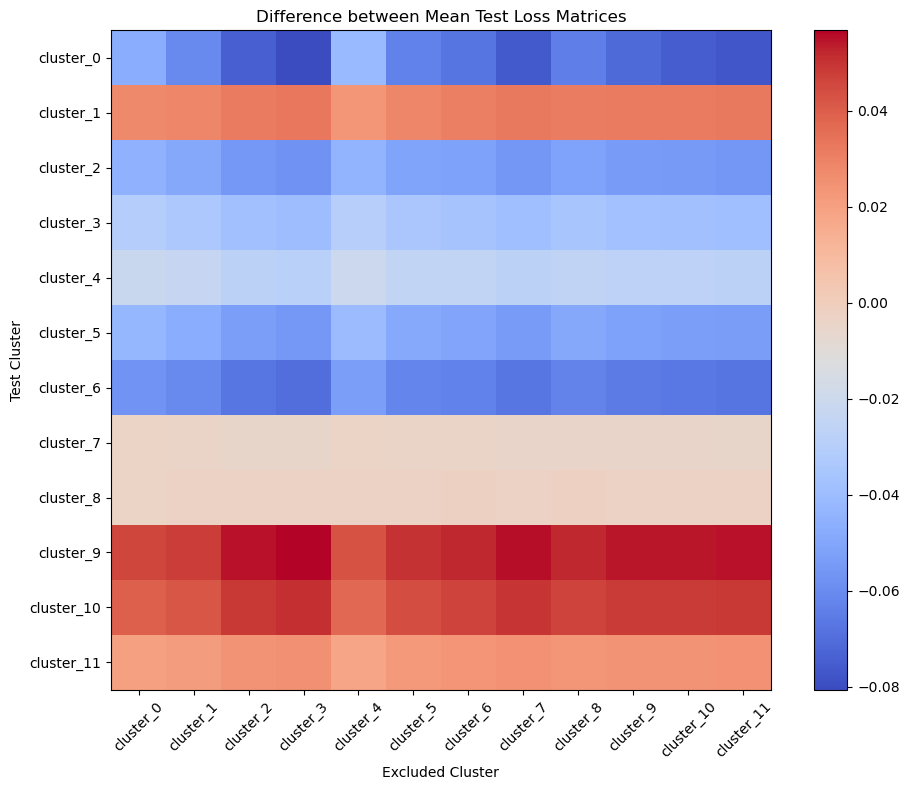

In [32]:
data = np.load(f"/Users/fquareng/experiments/new_dataset_12/UNet_experiments_12/756x/mean_test_loss_matrix.npz")
mean_test_loss_1 = data["arr_0"] 

data = np.load(f"/Users/fquareng/experiments/new_dataset_12/UNet_experiments_12/ofwe/mean_test_loss_matrix.npz")
mean_test_loss_2 = data["arr_0"] 

diff = mean_test_loss_1 - mean_test_loss_2
# Plot the difference matrix
plt.figure(figsize=(10, 8))
plt.imshow(diff, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title("Difference between Mean Test Loss Matrices")
plt.xlabel("Excluded Cluster")
plt.ylabel("Test Cluster")
plt.xticks(np.arange(len(dataloaders)), list(dataloaders.keys()), rotation=45)
plt.yticks(np.arange(len(dataloaders)), list(dataloaders.keys()))
plt.tight_layout()


In [ ]:
n_clusters = 8  # Total clusters
base_path = "/Users/fquareng/experiments/"

metrics = {}

for exclude_cluster in range(n_clusters):  # Each iteration excludes a different cluster
    try:
        print(f"Cluster {exclude_cluster}")
        
        # Initialize the dictionary for the current exclude_cluster
        metrics[exclude_cluster] = {}

        # Try to find the experiment path for the excluded cluster
        pattern = os.path.join(base_path, f"*cluster_{exclude_cluster}*")  # Adjust wildcard usage
        exp_paths = glob.glob(pattern)
        
        if exp_paths:
            exp_path = exp_paths[0]
            mean_mse = np.mean(np.load(os.path.join(exp_path, f"cluster_{exclude_cluster}_test_losses.npy")))
            metrics[exclude_cluster]["mse"] = mean_mse
            print(f"Cluster {exclude_cluster} MSE: {mean_mse}")
        else:
            print(f"No data found for cluster {exclude_cluster}.")
            continue
        
        # List to store mean MSEs for all other clusters (excluding current one)
        list_mean_mse = []
        for i in range(n_clusters):
            if i != exclude_cluster:
                try:
                    # Use glob to match directories/files dynamically
                    pattern = os.path.join(base_path, f"*cluster_{i}*")
                    exp_paths = glob.glob(pattern)
                    
                    if exp_paths:
                        exp_path = exp_paths[0]
                        mean_mse = np.mean(np.load(os.path.join(exp_path, f"cluster_{i}_test_losses.npy")))
                        list_mean_mse.append(mean_mse)
                    else:
                        print(f"No data found for cluster {i}.")
                except Exception as e:
                    print(f"Error with cluster {i}: {e}")

        if list_mean_mse:
            mean_consistency = np.mean(np.array(list_mean_mse))
            metrics[exclude_cluster]["Error"] = mean_consistency
            print(f"Cluster {exclude_cluster} consistency error: {mean_consistency}")
    
    except Exception as e:
        print(f"Skipping cluster {exclude_cluster} due to error: {e}")

Cluster 0
Cluster 0 MSE: 0.8857764153825965
No data found for cluster 4.
Cluster 0 consistency error: 1.034546462912763
Cluster 1
Cluster 1 MSE: 1.8296449970310698
No data found for cluster 4.
Cluster 1 consistency error: 0.8772350326380175
Cluster 2
Cluster 2 MSE: 0.27571903274197973
No data found for cluster 4.
Cluster 2 consistency error: 1.1362226933528659
Cluster 3
Cluster 3 MSE: 1.3798066048284032
No data found for cluster 4.
Cluster 3 consistency error: 0.9522080980051286
Cluster 4
No data found for cluster 4.
Cluster 5
Cluster 5 MSE: 0.8112482665787483
No data found for cluster 4.
Cluster 5 consistency error: 1.046967821046738
Cluster 6
Cluster 6 MSE: 0.17303313102602644
No data found for cluster 4.
Cluster 6 consistency error: 1.153337010305525
Cluster 7
Cluster 7 MSE: 1.7378267452703509
No data found for cluster 4.
Cluster 7 consistency error: 0.8925380745981375


Processing: /Users/fquareng/experiments/953m (all_incomplete 2)/cluster_0_test_losses.npy
Processing: /Users/fquareng/experiments/953m (all_incomplete 2)/cluster_1_test_losses.npy
Processing: /Users/fquareng/experiments/953m (all_incomplete 2)/cluster_2_test_losses.npy
Processing: /Users/fquareng/experiments/953m (all_incomplete 2)/cluster_3_test_losses.npy
Processing: /Users/fquareng/experiments/953m (all_incomplete 2)/cluster_5_test_losses.npy
Processing: /Users/fquareng/experiments/953m (all_incomplete 2)/cluster_6_test_losses.npy
Processing: /Users/fquareng/experiments/953m (all_incomplete 2)/cluster_7_test_losses.npy

Final Metrics:
{'step1': {'Error': np.float64(0.43875561592660794), 'mse': np.float64(0.3983772779222925)}}


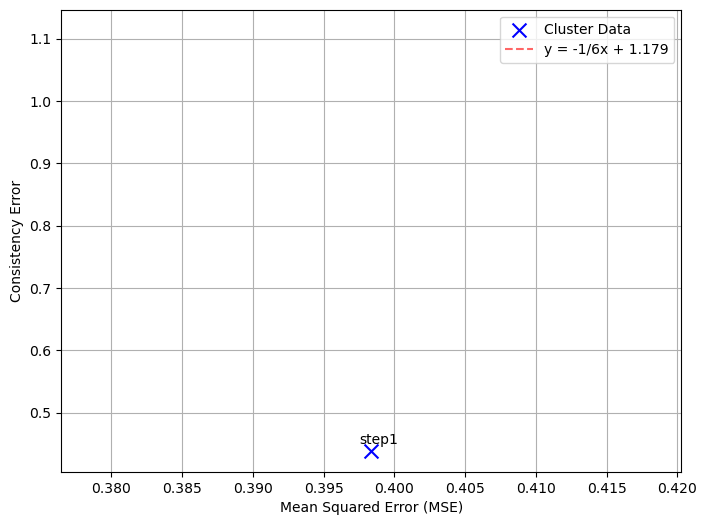

In [147]:


# Define base path
base_path = "/Users/fquareng/experiments/"

# Search for experiment folder
pattern = os.path.join(base_path, "*all_incomplete 2*")
exp_paths = glob.glob(pattern)

if not exp_paths:
    raise FileNotFoundError(f"No experiment folder matching pattern: {pattern}")

exp_path = exp_paths[0]  # Use first match

# Initialize metrics dictionary
metrics = {'step1': {"Error": None, "mse": None}}

# Load overall MSE for all clusters
loss_file = os.path.join(exp_path, "all_clusters_test_losses.npy")
if not os.path.exists(loss_file):
    raise FileNotFoundError(f"File not found: {loss_file}")

metrics['step1']["mse"] = np.mean(np.load(loss_file))

# Define the cluster to exclude
exclude_cluster = 4
hist_mean_loss_per_cluster = []

# Process each cluster except the excluded one
for i in range(n_clusters):
    if i == exclude_cluster:
        continue
    
    # Search for cluster-specific test loss file
    pattern = os.path.join(exp_path, f"*cluster_{i}_test_losses.npy")
    loss_files = glob.glob(pattern)
    
    if not loss_files:
        print(f"Warning: No test loss file found for cluster {i}. Skipping...")
        continue
    
    loss_file_path = loss_files[0]
    print(f"Processing: {loss_file_path}")
    
    # Compute mean loss for this cluster
    mean_loss_per_cluster = np.mean(np.load(loss_file_path))
    hist_mean_loss_per_cluster.append(mean_loss_per_cluster)

# Compute and store the mean error across all included clusters
if hist_mean_loss_per_cluster:
    metrics['step1']["Error"] = np.mean(hist_mean_loss_per_cluster)

# Print final metrics
print("\nFinal Metrics:")
print(metrics)

# Extract MSE and Error values from the metrics dictionary
mse_values = [data["mse"] for data in metrics.values() if "mse" in data and "Error" in data]
error_values = [data["Error"] for data in metrics.values() if "mse" in data and "Error" in data]
clusters = [str(cluster) for cluster in metrics.keys() if "mse" in metrics[cluster] and "Error" in metrics[cluster]]

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(mse_values, error_values, color='b', label='Cluster Data', alpha=1, marker='x', s=100)

# Plot trend line using NumPy for efficiency
x_vals = np.linspace(min(mse_values), max(mse_values), 100)
y_vals = -1/6 * x_vals + 1.179
plt.plot(x_vals, y_vals, label="y = -1/6x + 1.179", linestyle="--", color="r", alpha=0.6)

# Add labels and title
plt.xlabel('Mean Squared Error (MSE)')
plt.ylabel('Consistency Error')
plt.grid(True)

# Annotate each cluster
for i, cluster in enumerate(clusters):
    try:
        plt.annotate(cluster, (mse_values[i], error_values[i]), textcoords="offset points", xytext=(5, 5), ha='center')
    except Exception as e:
        print(f"Skipping annotation for cluster {cluster} due to error: {e}")

plt.legend()
plt.show()

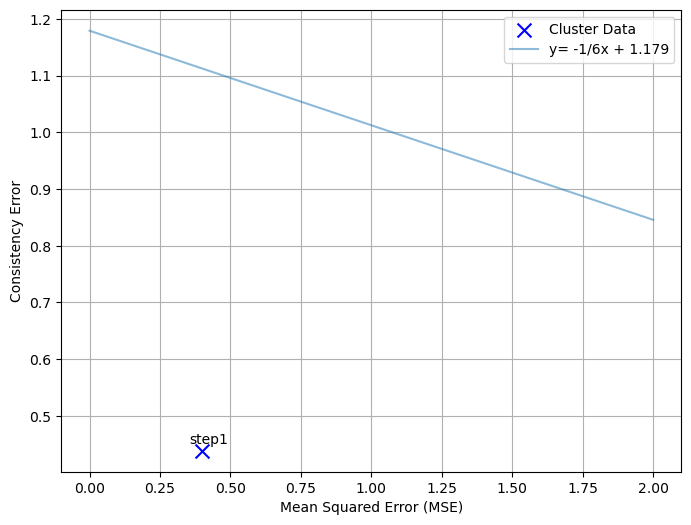

In [148]:
import matplotlib.pyplot as plt

# Assuming 'metrics' is the dictionary you populated in the previous part of the code
mse_values = []
error_values = []

# Extract MSE and Error values
for cluster, data in metrics.items():
    if "mse" in data and "Error" in data:
        mse_values.append(data["mse"])
        error_values.append(data["Error"])

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(mse_values, error_values, color='b', label='Cluster Data', alpha=1, marker='x', s=100)
plt.plot(list(range(3)), [-1/6*e+1.179 for e in range(3)], label="y= -1/6x + 1.179", alpha=.5)

# Adding labels and title
plt.xlabel('Mean Squared Error (MSE)')
plt.ylabel('Consistency Error')
plt.grid(True)

# Optional: Adding annotations for each cluster
for cluster, data in metrics.items():
    try:
        plt.annotate(f"{cluster}", (data['mse'], data['Error']), textcoords="offset points", xytext=(5, 5), ha='center')
    except:
        print(f"Excluding cluster {cluster}")
# Show the plot
plt.legend()
plt.show()

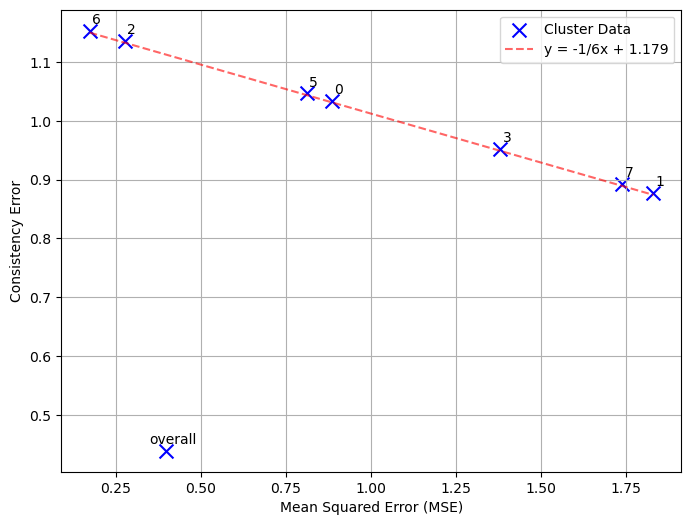

In [93]:
pattern = os.path.join(base_path, f"*(all_incomplete 2)*")  # Adjust wildcard usage
exp_path = glob.glob(pattern)[0]
metrics['step1'] = {}
metrics['step1']["Error"] = {}
metrics['step1']["mse"] = np.mean(np.load(os.path.join(exp_path, "all_clusters_test_losses.npy")))

exclude_cluster = 4

hist_mean_loss_per_cluster = []
for i in range(n_clusters):
    if i != exclude_cluster:
        pattern = os.path.join(str(exp_path), f"*cluster_{i}_test_losses.npy*")  # Adjust wildcard usage
        new_path = glob.glob(pattern)[0]
        print(pattern)
        mean_loss_per_cluster = np.mean(np.load(new_path))
        hist_mean_loss_per_cluster.append(mean_loss_per_cluster)
metrics['step1']["Error"] = np.mean(np.array(hist_mean_loss_per_cluster))

/Users/fquareng/experiments/953m (all_incomplete 2)/*cluster_0_test_losses.npy*
/Users/fquareng/experiments/953m (all_incomplete 2)/*cluster_1_test_losses.npy*
/Users/fquareng/experiments/953m (all_incomplete 2)/*cluster_2_test_losses.npy*
/Users/fquareng/experiments/953m (all_incomplete 2)/*cluster_3_test_losses.npy*
/Users/fquareng/experiments/953m (all_incomplete 2)/*cluster_5_test_losses.npy*
/Users/fquareng/experiments/953m (all_incomplete 2)/*cluster_6_test_losses.npy*
/Users/fquareng/experiments/953m (all_incomplete 2)/*cluster_7_test_losses.npy*


Processing Cluster 0 (excluded)
Cluster 0 MSE: 0.8857764153825965
Cluster 0 Consistency Error: 1.034546462912763
Processing Cluster 1 (excluded)
Cluster 1 MSE: 1.8296449970310698
Cluster 1 Consistency Error: 0.8772350326380175
Processing Cluster 2 (excluded)
Cluster 2 MSE: 0.27571903274197973
Cluster 2 Consistency Error: 1.1362226933528659
Processing Cluster 3 (excluded)
Cluster 3 MSE: 1.3798066048284032
Cluster 3 Consistency Error: 0.9522080980051286
Processing Cluster 4 (excluded)
Processing Cluster 5 (excluded)
Cluster 5 MSE: 0.8112482665787483
Cluster 5 Consistency Error: 1.046967821046738
Processing Cluster 6 (excluded)
Cluster 6 MSE: 0.17303313102602644
Cluster 6 Consistency Error: 1.153337010305525
Processing Cluster 7 (excluded)
Cluster 7 MSE: 1.7378267452703509
Cluster 7 Consistency Error: 0.8925380745981375

Final Metrics:
{0: {'mse': np.float64(0.8857764153825965), 'Error': np.float64(1.034546462912763)}, 1: {'mse': np.float64(1.8296449970310698), 'Error': np.float64(0.87723

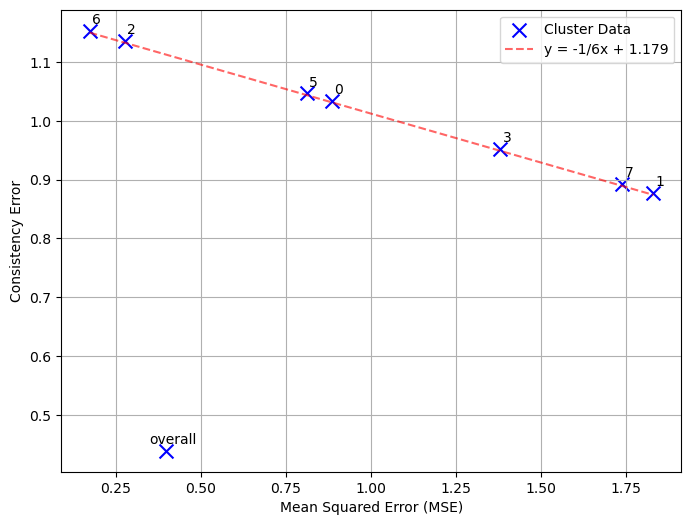

In [149]:
import os
import glob
import numpy as np

# Define base path
base_path = "/Users/fquareng/experiments/"
n_clusters = 8  # Total number of clusters

# Initialize metrics dictionary
metrics = {}

# Iterate over clusters, each time excluding one
for exclude_cluster in range(n_clusters):
    try:
        print(f"Processing Cluster {exclude_cluster} (excluded)")

        # Initialize the dictionary for this exclusion step
        metrics[exclude_cluster] = {}

        # Locate the excluded cluster's test loss file
        pattern = os.path.join(base_path, f"*cluster_{exclude_cluster}*")
        exp_paths = glob.glob(pattern)

        if not exp_paths:
            print(f"Warning: No data found for excluded cluster {exclude_cluster}. Skipping...")
            continue

        exp_path = exp_paths[0]
        mse_file = os.path.join(exp_path, f"cluster_{exclude_cluster}_test_losses.npy")

        if os.path.exists(mse_file):
            mean_mse = np.mean(np.load(mse_file))
            metrics[exclude_cluster]["mse"] = mean_mse
            print(f"Cluster {exclude_cluster} MSE: {mean_mse}")
        else:
            print(f"Warning: Test loss file missing for cluster {exclude_cluster}.")
            continue

        # Compute consistency error across all other clusters
        list_mean_mse = []
        for i in range(n_clusters):
            if i == exclude_cluster:
                continue

            pattern = os.path.join(base_path, f"*cluster_{i}*")
            exp_paths = glob.glob(pattern)

            if not exp_paths:
                print(f"Warning: No data found for cluster {i}. Skipping...")
                continue

            cluster_path = exp_paths[0]
            loss_file = os.path.join(cluster_path, f"cluster_{i}_test_losses.npy")

            if os.path.exists(loss_file):
                mean_loss_per_cluster = np.mean(np.load(loss_file))
                list_mean_mse.append(mean_loss_per_cluster)
            else:
                print(f"Warning: Test loss file missing for cluster {i}. Skipping...")

        # Compute and store the mean consistency error
        if list_mean_mse:
            metrics[exclude_cluster]["Error"] = np.mean(list_mean_mse)
            print(f"Cluster {exclude_cluster} Consistency Error: {metrics[exclude_cluster]['Error']}")

    except Exception as e:
        print(f"Skipping cluster {exclude_cluster} due to error: {e}")

# **Processing Overall Metrics**
overall_pattern = os.path.join(base_path, "*all_incomplete 2*")
overall_exp_paths = glob.glob(overall_pattern)

if not overall_exp_paths:
    raise FileNotFoundError(f"No experiment folder matching pattern: {overall_pattern}")

overall_exp_path = overall_exp_paths[0]  # Use first match
overall_loss_file = os.path.join(overall_exp_path, "all_clusters_test_losses.npy")

if not os.path.exists(overall_loss_file):
    raise FileNotFoundError(f"File not found: {overall_loss_file}")

# Store overall metrics in a separate key
metrics['overall'] = {
    "mse": np.mean(np.load(overall_loss_file)),
    "Error": None
}

# Compute error by excluding cluster 4
exclude_cluster = 4
hist_mean_loss_per_cluster = []

for i in range(n_clusters):
    if i == exclude_cluster:
        continue

    pattern = os.path.join(overall_exp_path, f"*cluster_{i}_test_losses.npy")
    loss_files = glob.glob(pattern)

    if not loss_files:
        print(f"Warning: No test loss file found for cluster {i}. Skipping...")
        continue

    loss_file_path = loss_files[0]
    mean_loss_per_cluster = np.mean(np.load(loss_file_path))
    hist_mean_loss_per_cluster.append(mean_loss_per_cluster)

if hist_mean_loss_per_cluster:
    metrics['overall']["Error"] = np.mean(hist_mean_loss_per_cluster)

# Print final metrics
print("\nFinal Metrics:")
print(metrics)

import matplotlib.pyplot as plt
import numpy as np

# Extract MSE and Error values from the metrics dictionary
mse_values = [data["mse"] for data in metrics.values() if "mse" in data and "Error" in data]
error_values = [data["Error"] for data in metrics.values() if "mse" in data and "Error" in data]
clusters = [str(cluster) for cluster in metrics.keys() if "mse" in metrics[cluster] and "Error" in metrics[cluster]]

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(mse_values, error_values, color='b', label='Cluster Data', alpha=1, marker='x', s=100)

# Plot trend line using NumPy for efficiency
x_vals = np.linspace(min(mse_values), max(mse_values), 100)
y_vals = -1/6 * x_vals + 1.179
plt.plot(x_vals, y_vals, label="y = -1/6x + 1.179", linestyle="--", color="r", alpha=0.6)

# Add labels and title
plt.xlabel('Mean Squared Error (MSE)')
plt.ylabel('Consistency Error')
plt.grid(True)

# Annotate each cluster
for i, cluster in enumerate(clusters):
    try:
        plt.annotate(cluster, (mse_values[i], error_values[i]), textcoords="offset points", xytext=(5, 5), ha='center')
    except Exception as e:
        print(f"Skipping annotation for cluster {cluster} due to error: {e}")

plt.legend()
plt.show()